In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel(r"C:\Users\HP\Downloads\archive\dataset.xlsx")

In [51]:
df=data.copy()

In [52]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [53]:
#savoir nbre de ligne et colonne
data.shape

(5644, 111)

In [54]:
#afficher le type de chaque colonne
data.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

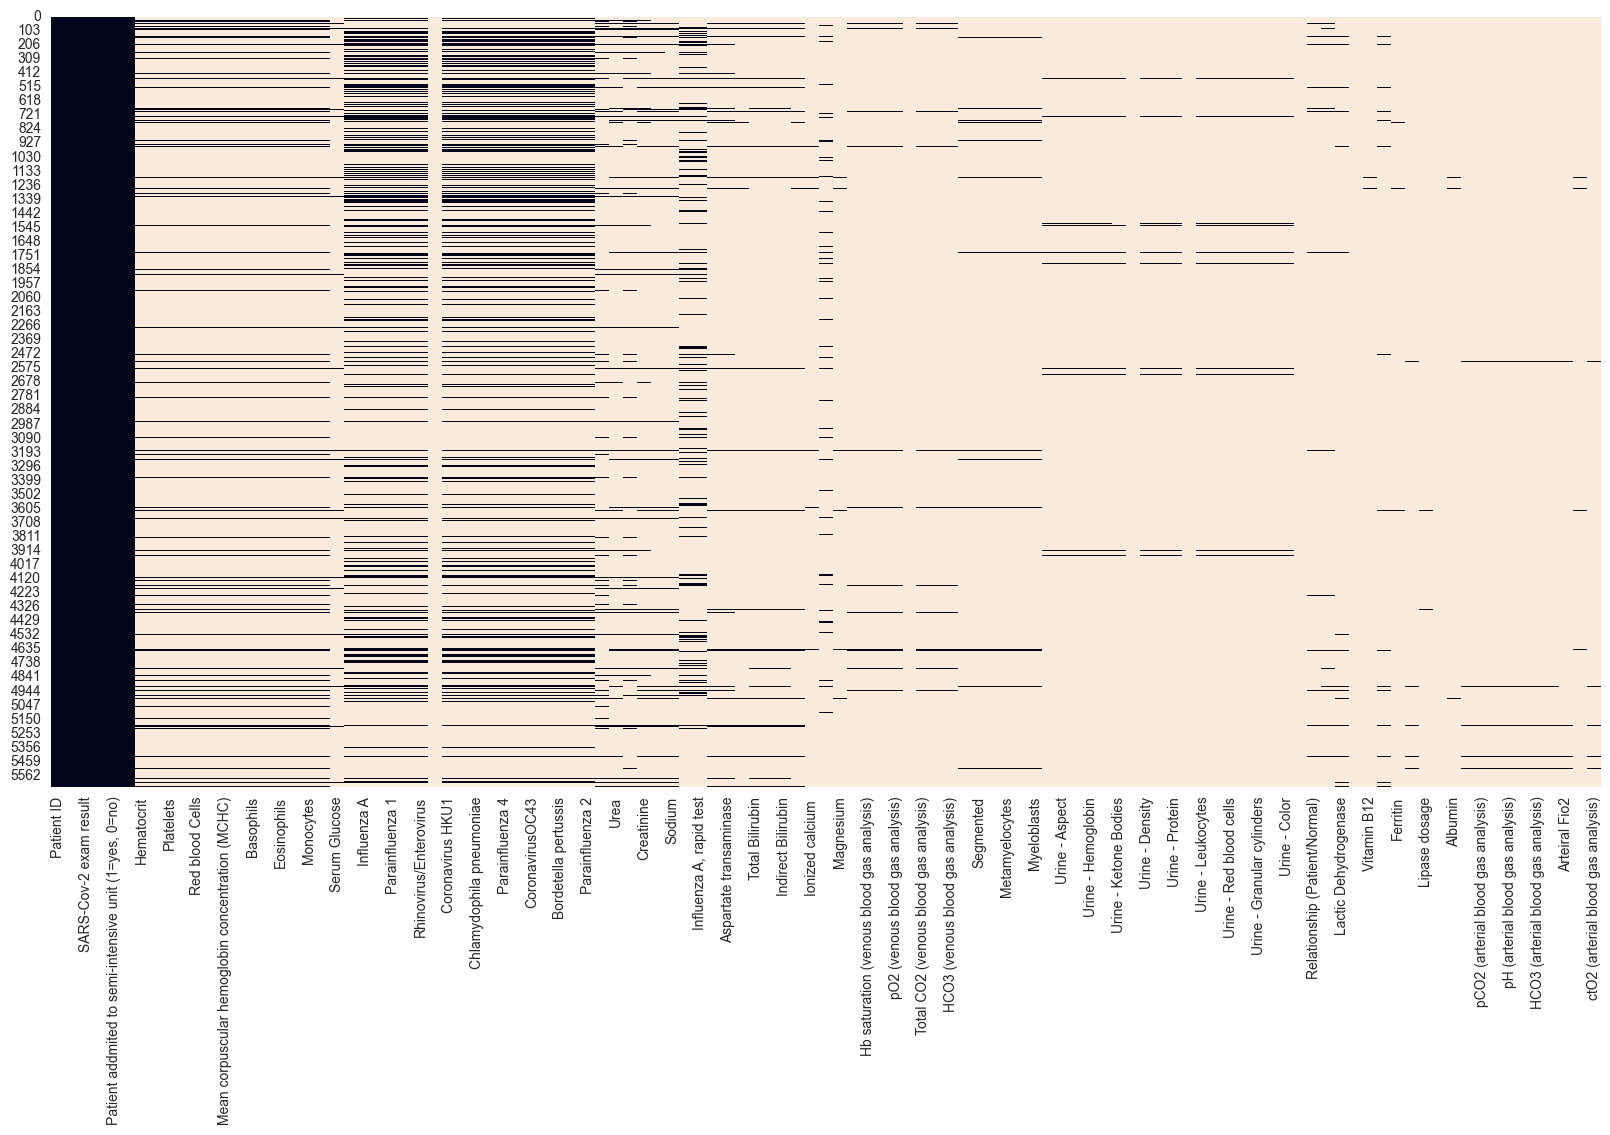

In [55]:
#affiche tout le data set pour savoir les valeur manquante 
data.isna() # pour savoir si il y a des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False) # pour savoir si il y a des valeurs manquantes


In [56]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True) # pour savoir si il y a des valeurs manquantes en ordre croissant

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Mycoplasma pneumoniae                                    1.0
Urine - Sugar                                            1.0
Prothrombin time (PT), Activity                          1.0
Partial thromboplastin time (PTT)                        1.0
D-Dimer                                                  1.0
Length: 111, dtype: float64

In [57]:
 df=df[df.columns[df.isna().sum()/df.shape[0]< 0.9]]  # injerter les colonnes dont le % de valeurs manquantes est inférieur à 90% dans un nouveau df 

<Axes: >

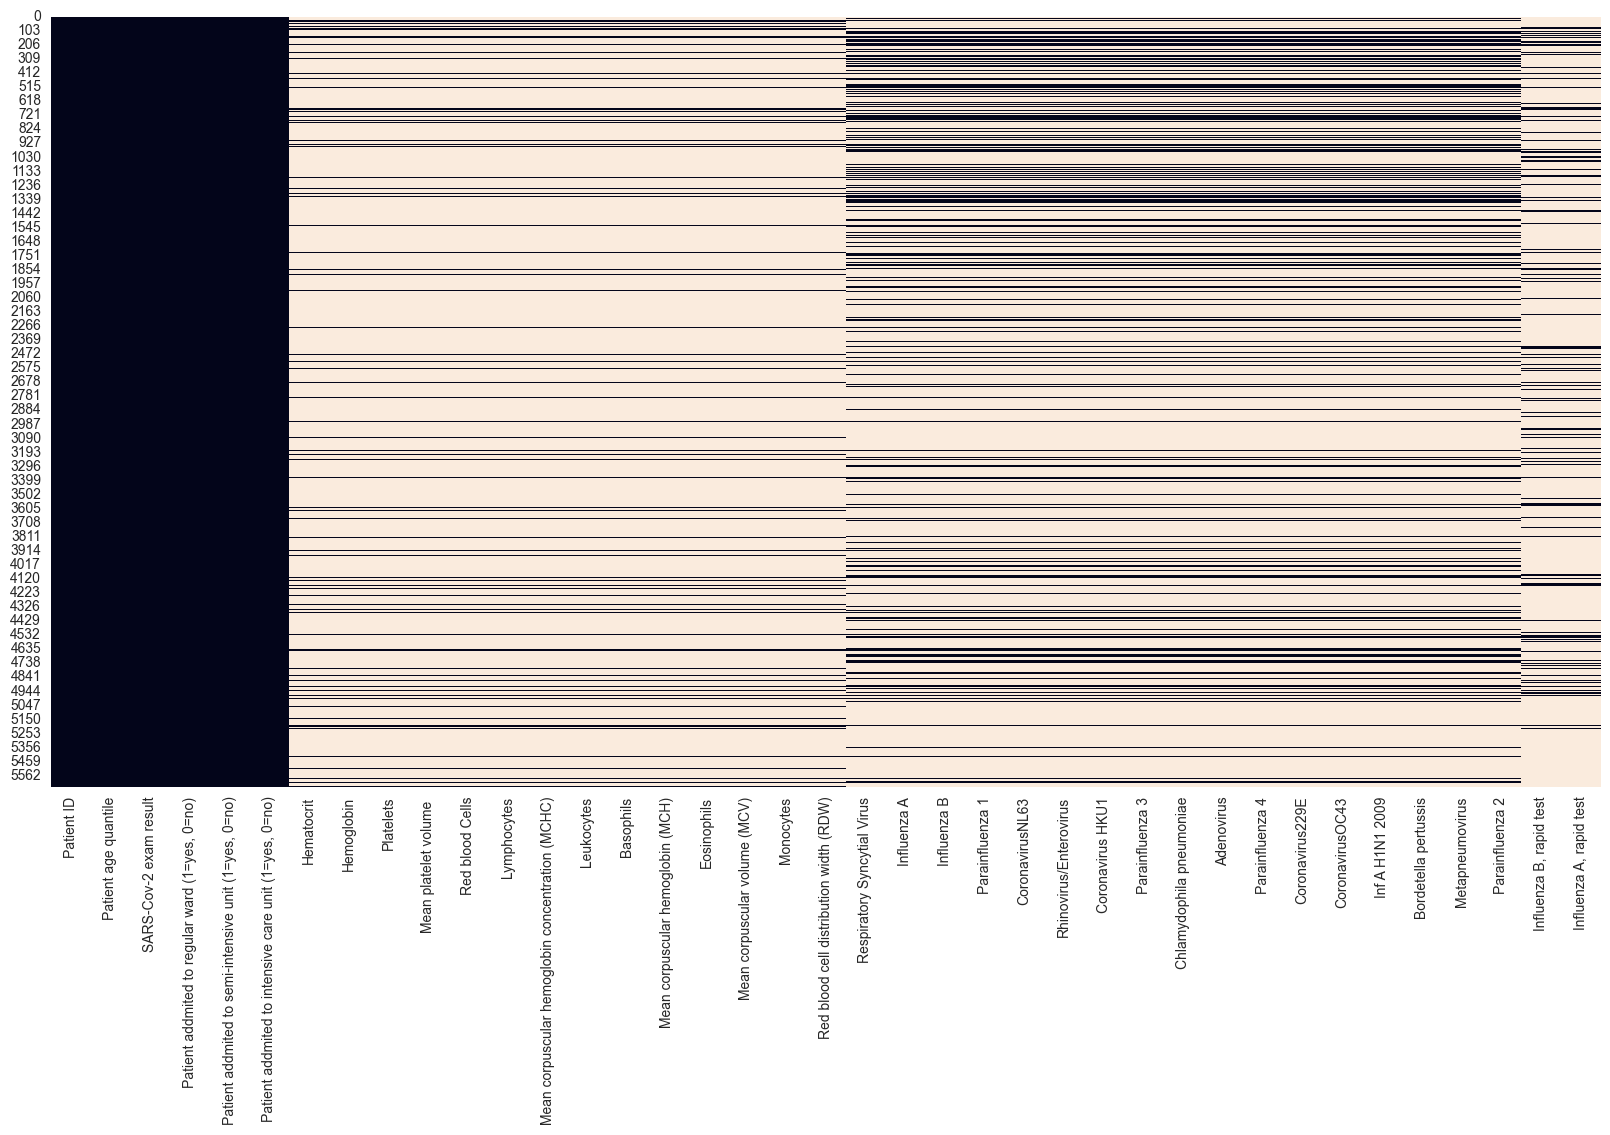

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False) # pour savoir si il y a des valeurs manquantes

In [59]:
df=df.drop('Patient ID',axis=1) # supprimer la colonne Patient ID (en gros avoir des id pareil sert a rien )
print(df.columns)

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rap

In [60]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True) # pour savoir les cas positif et negatif en %

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

histogramme des variable continu

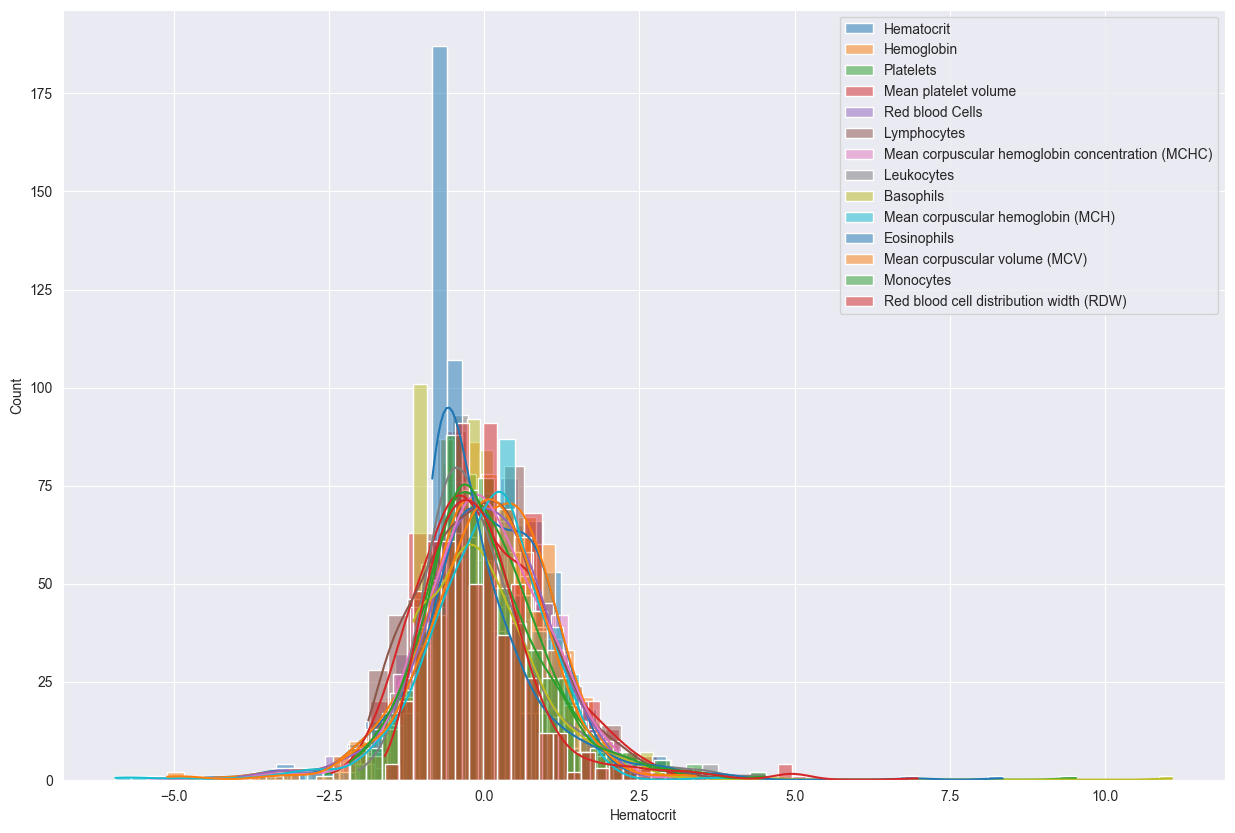

In [61]:
import matplotlib.pyplot as plt

# Créer un graphique avec plusieurs courbes (histogrammes)
plt.figure(figsize=(15, 10))  # Taille de la figure

# Boucle sur les colonnes de type float
for col in df.select_dtypes('float'):
    sns.histplot(df[col] , kde=True ,label=col, legend=True)
    
# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

Patient age quantile
11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: count, dtype: int64

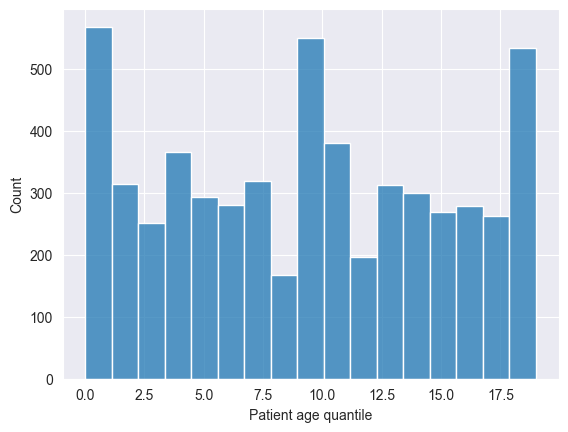

In [62]:
sns.histplot(df['Patient age quantile'])
df['Patient age quantile'].value_counts()
#df['Patient age quantile'].unique()

variable qualitative

In [63]:
df['SARS-Cov-2 exam result'].unique() 

array(['negative', 'positive'], dtype=object)

In [64]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

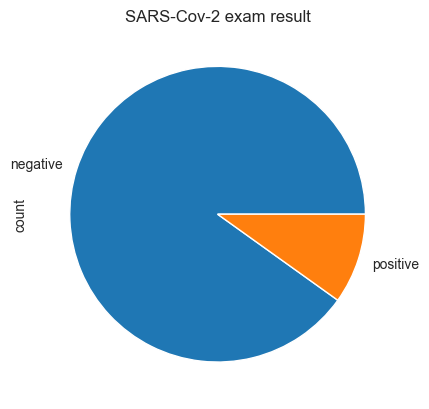

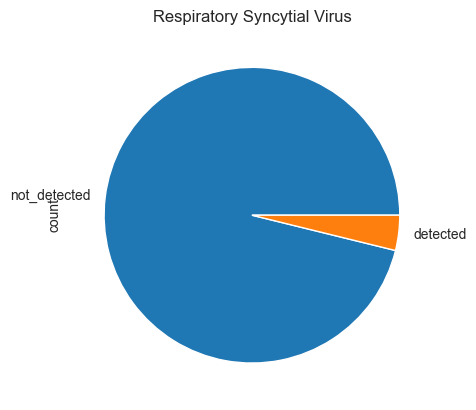

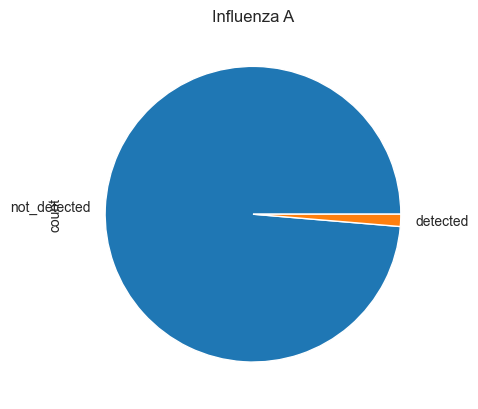

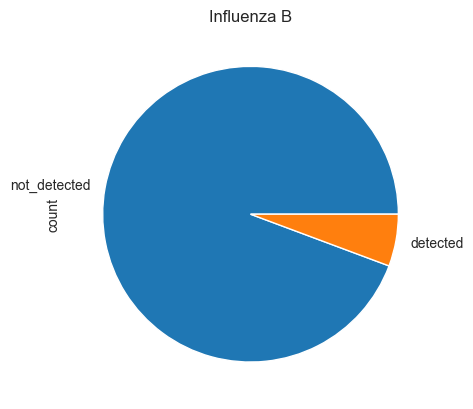

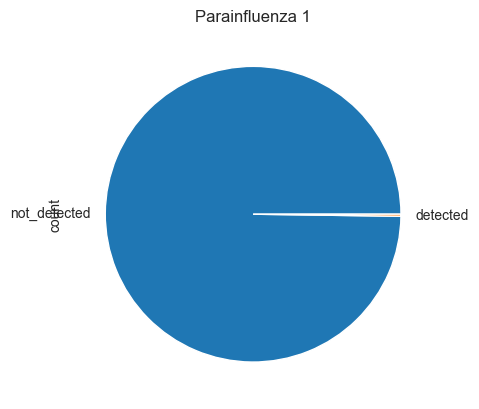

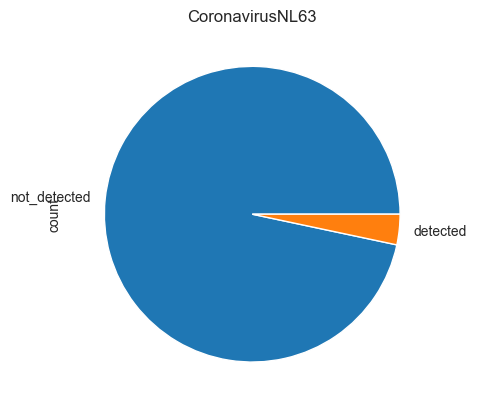

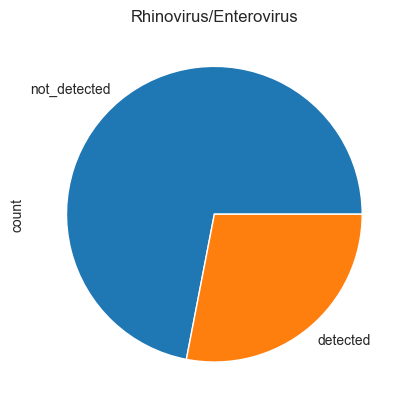

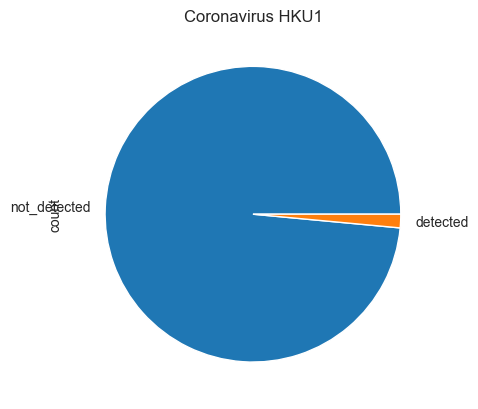

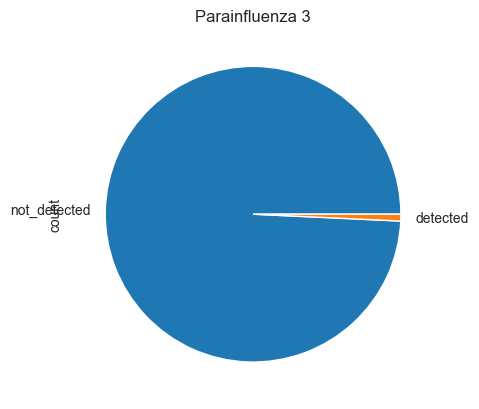

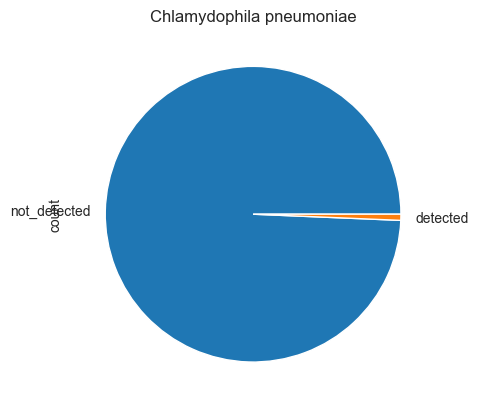

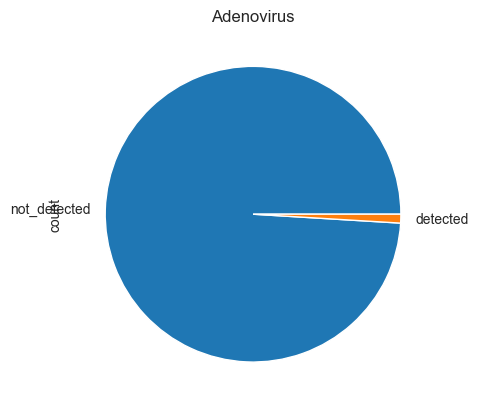

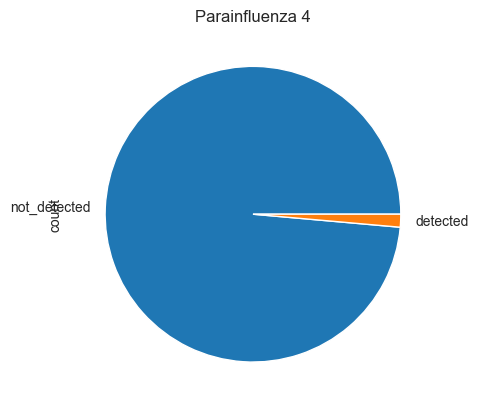

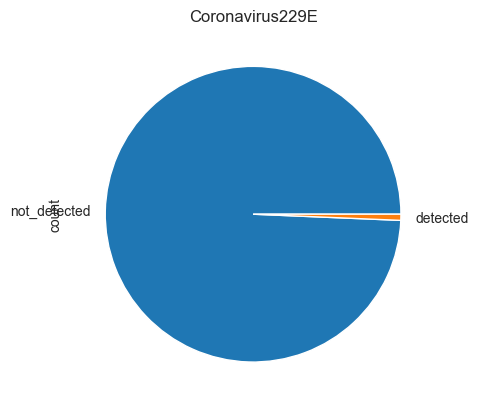

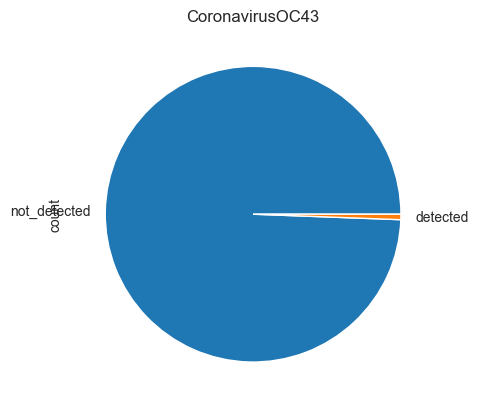

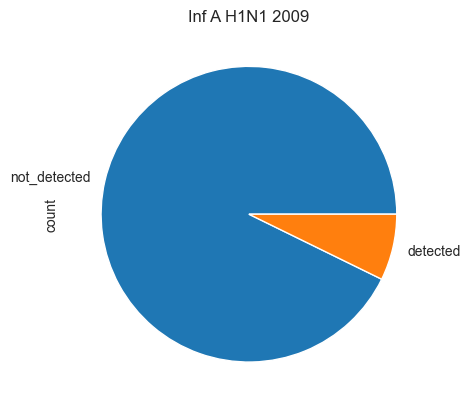

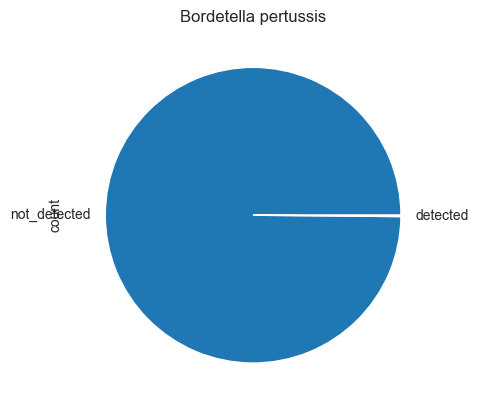

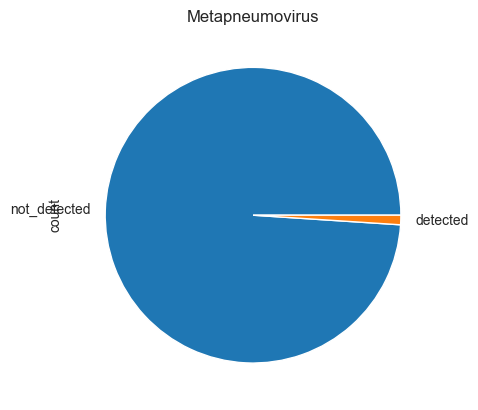

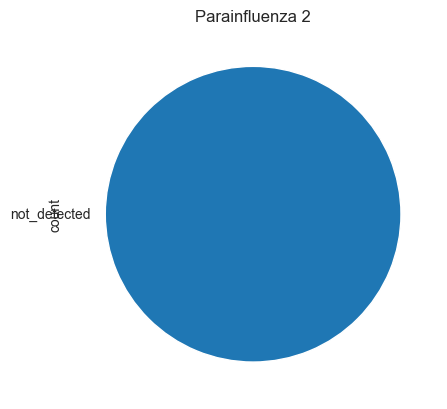

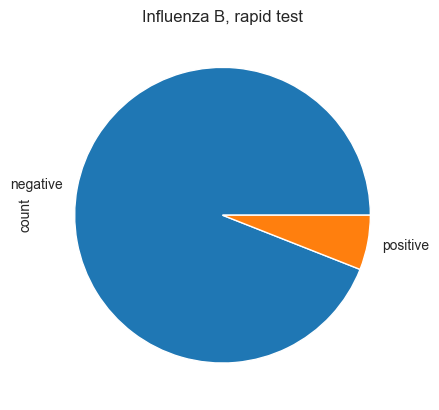

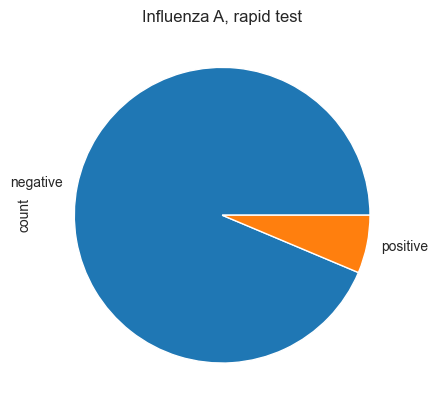

In [65]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.title(col)

relattion Target / variable 
creation de sous-ensemble positif et negatif

In [66]:
df_pos = df[df['SARS-Cov-2 exam result'] == 'Positive']
df_neg = df[df['SARS-Cov-2 exam result'] == 'Negative']

In [67]:
df_pos.shape

(0, 38)

In [68]:
df_neg.shape

(0, 38)

pour afficher les collonnes dont le % de valeurs manquantes est inférieur à 90% et superieur à 80%

In [69]:
missing_rate= df.isna().sum()/df.shape[0]
blood_columns=df.columns[(missing_rate<0.9) & (missing_rate>0.8)]

In [70]:
blood_columns.shape

(16,)

In [71]:
viral_columns=df.columns[(missing_rate<0.88) & (missing_rate>0.75)]

In [72]:
viral_columns.shape

(19,)

Taeget / blood

In [73]:
print("Blood columns:", blood_columns.tolist()) 

Blood columns: ['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)', 'Influenza B, rapid test', 'Influenza A, rapid test']


In [74]:
# Création des DataFrames avec gestion des valeurs manquantes
df_pos = df[df['SARS-Cov-2 exam result'] == 'positive'].dropna(subset=blood_columns)
df_neg = df[df['SARS-Cov-2 exam result'] == 'negative'].dropna(subset=blood_columns)

In [75]:
# Vérification des tailles
print("Taille df_pos:", df_pos.shape)
print("Taille df_neg:", df_neg.shape)

Taille df_pos: (23, 38)
Taille df_neg: (173, 38)


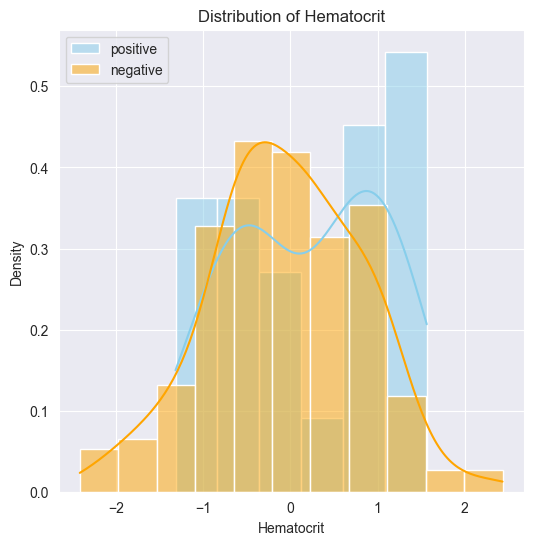

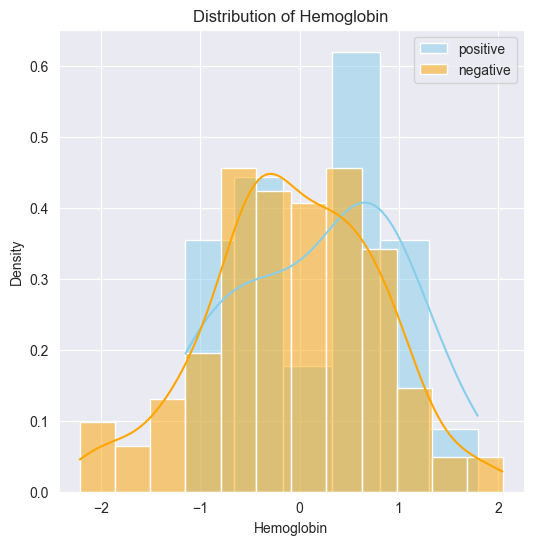

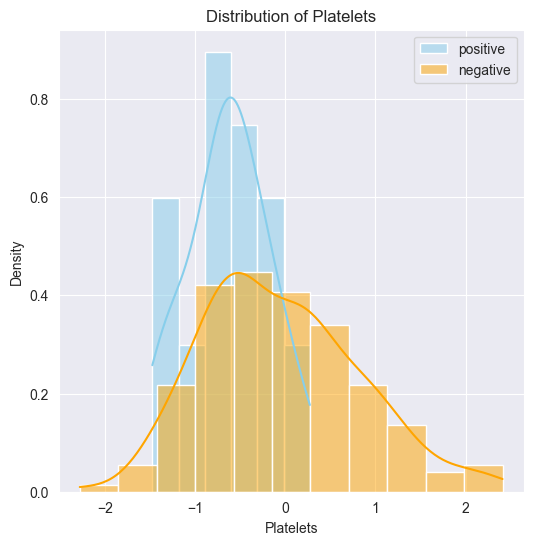

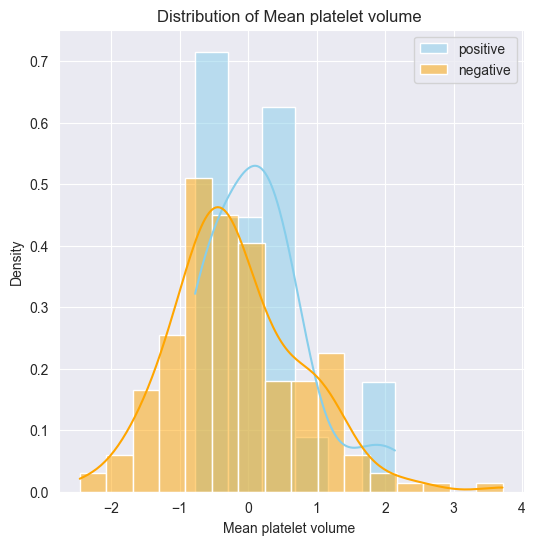

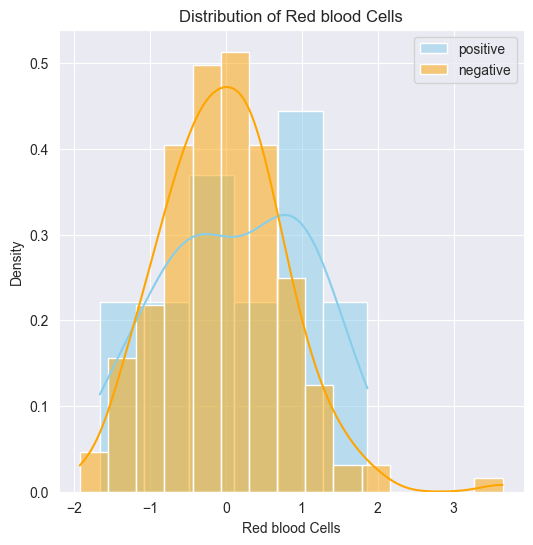

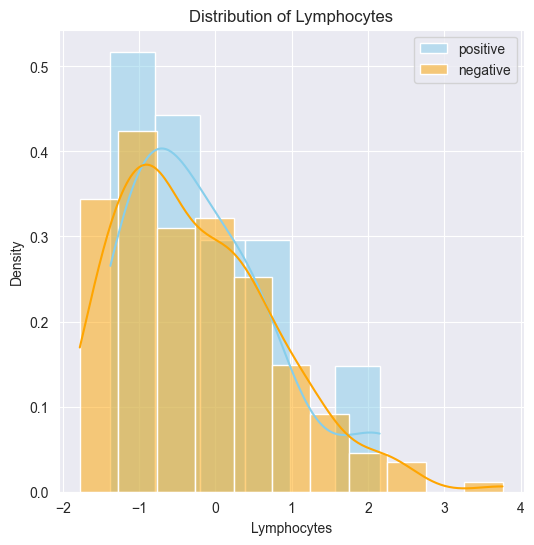

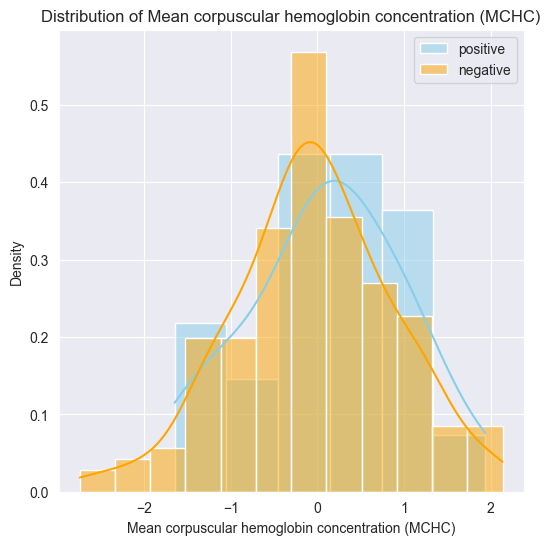

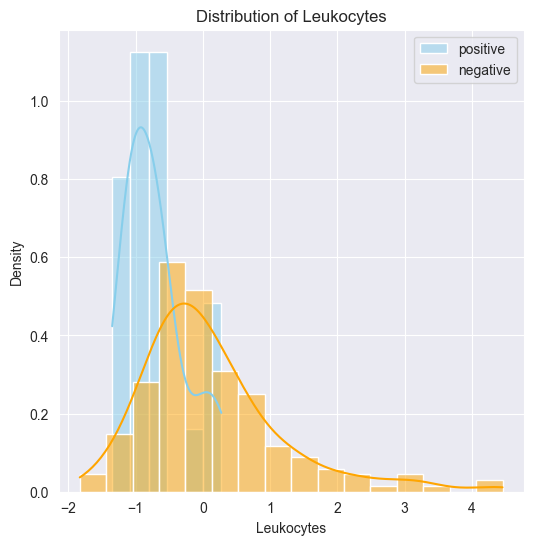

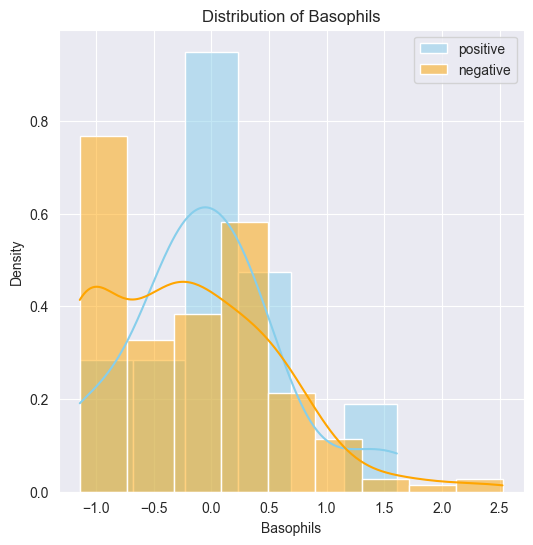

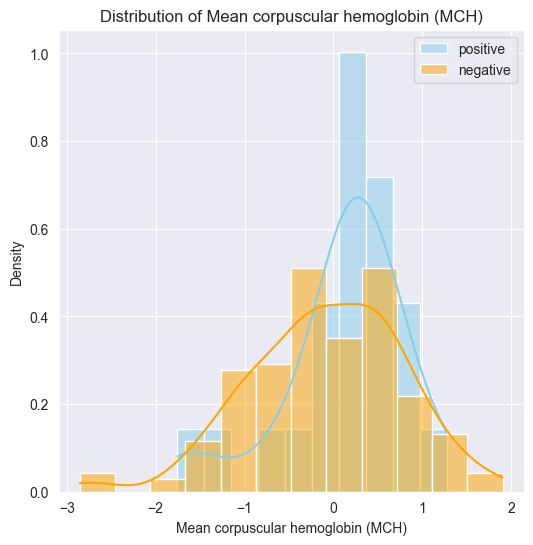

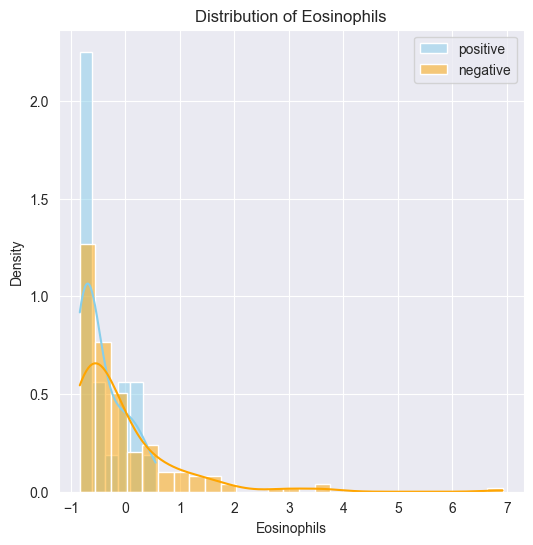

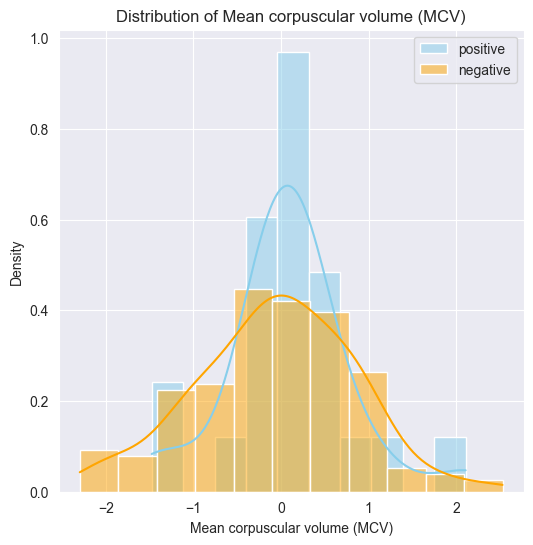

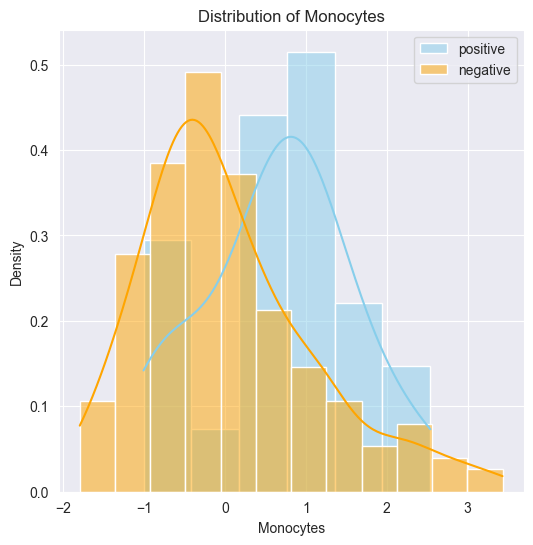

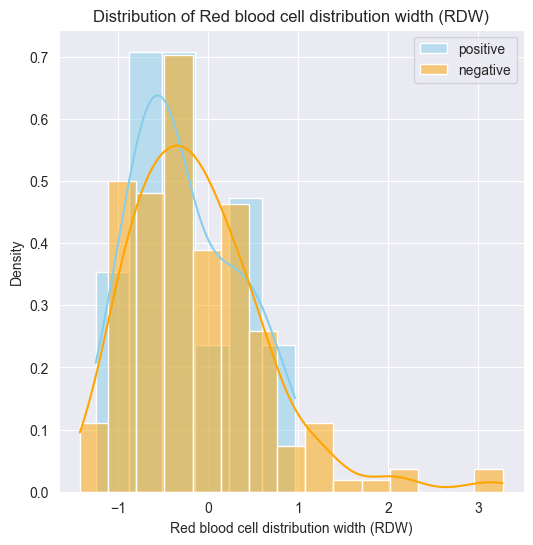

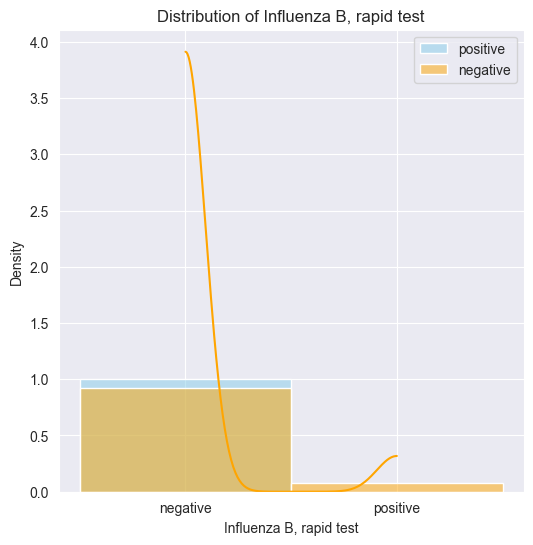

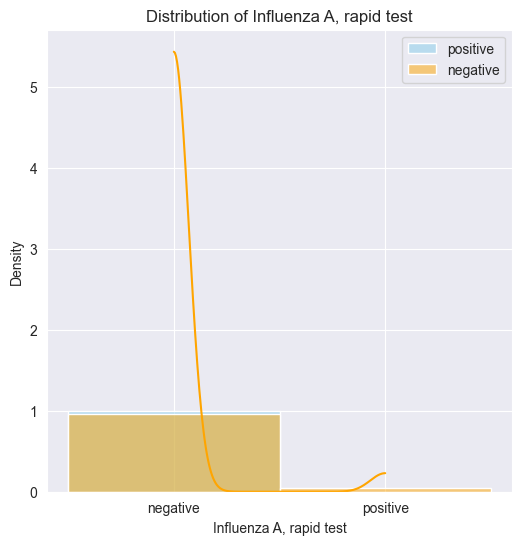

In [76]:
# Tracé des distributions
for col in blood_columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(data=df_pos[col], stat='density', alpha=0.5, label='positive', kde=True, color='skyblue')
    sns.histplot(data=df_neg[col], stat='density', alpha=0.5, label='negative', kde=True, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

<Axes: xlabel='Patient age quantile', ylabel='count'>

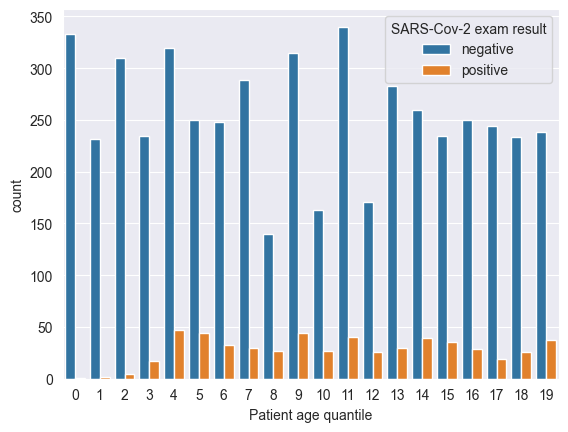

In [77]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

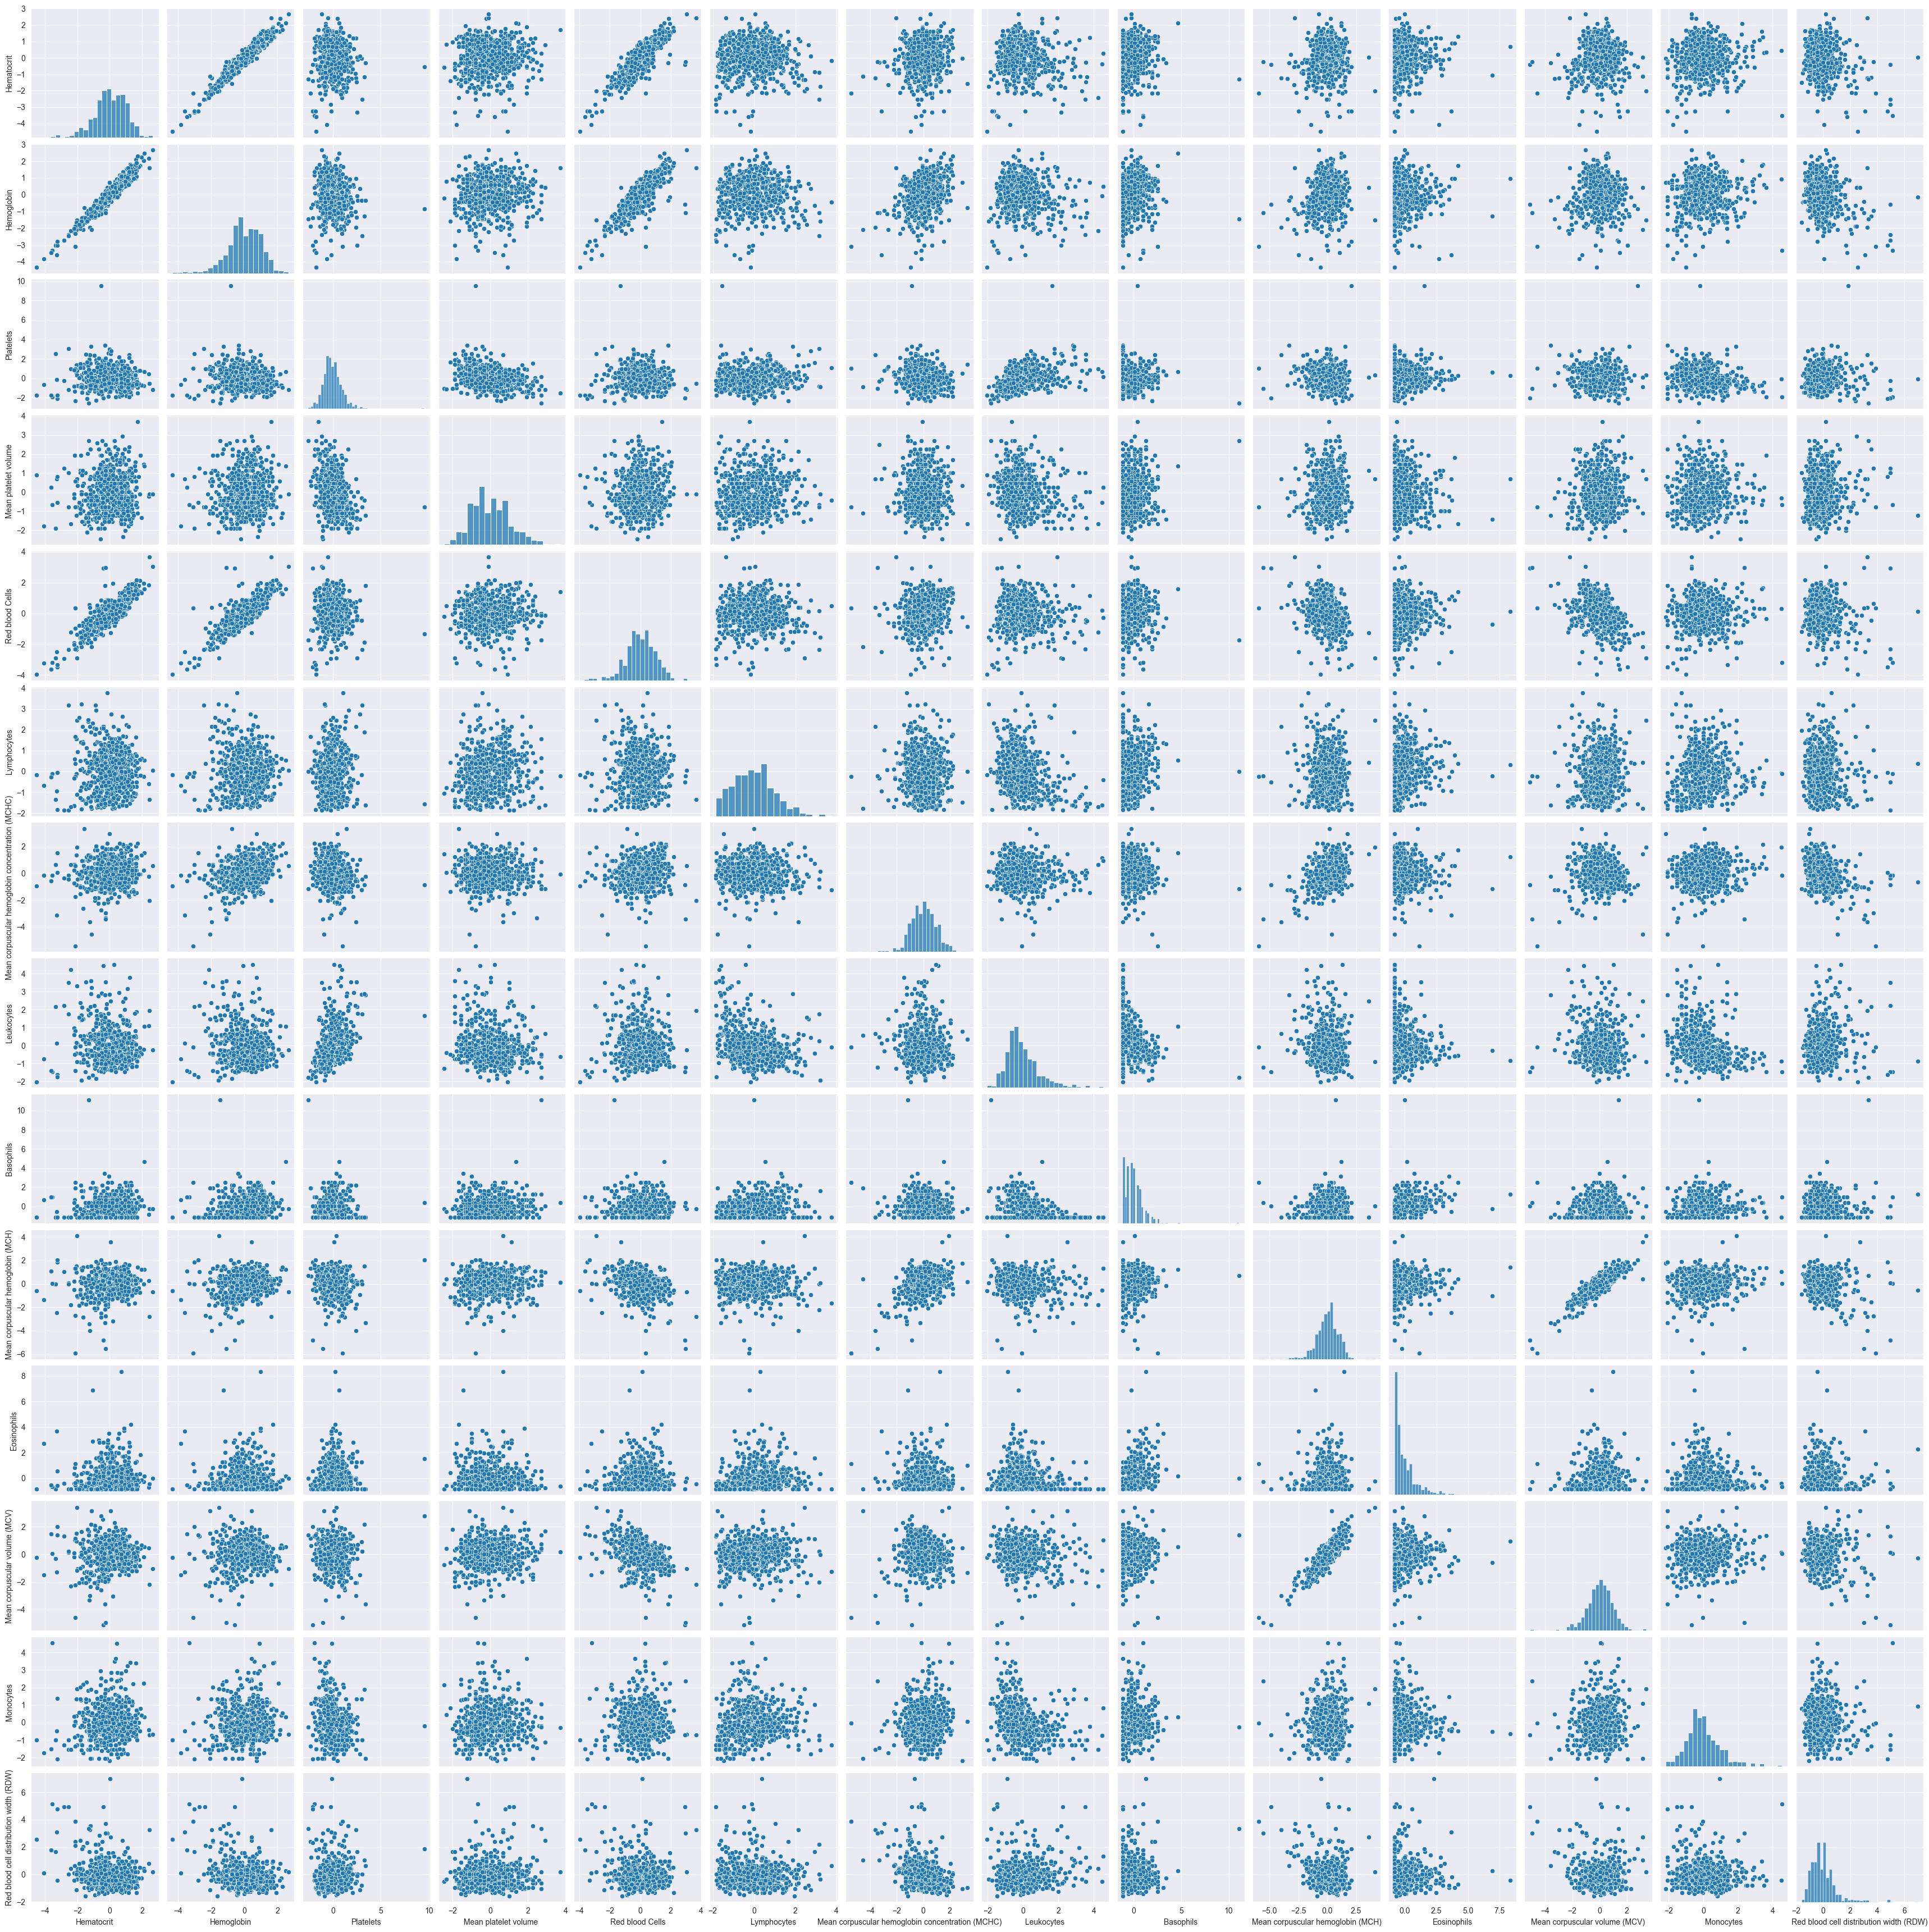

In [78]:
 sns.pairplot(df[blood_columns])

In [79]:
print(df[blood_columns].dtypes)

Hematocrit                                          float64
Hemoglobin                                          float64
Platelets                                           float64
Mean platelet volume                                float64
Red blood Cells                                     float64
Lymphocytes                                         float64
Mean corpuscular hemoglobin concentration (MCHC)    float64
Leukocytes                                          float64
Basophils                                           float64
Mean corpuscular hemoglobin (MCH)                   float64
Eosinophils                                         float64
Mean corpuscular volume (MCV)                       float64
Monocytes                                           float64
Red blood cell distribution width (RDW)             float64
Influenza B, rapid test                              object
Influenza A, rapid test                              object
dtype: object


In [80]:
print(df[viral_columns].dtypes)

Respiratory Syncytial Virus    object
Influenza A                    object
Influenza B                    object
Parainfluenza 1                object
CoronavirusNL63                object
Rhinovirus/Enterovirus         object
Coronavirus HKU1               object
Parainfluenza 3                object
Chlamydophila pneumoniae       object
Adenovirus                     object
Parainfluenza 4                object
Coronavirus229E                object
CoronavirusOC43                object
Inf A H1N1 2009                object
Bordetella pertussis           object
Metapneumovirus                object
Parainfluenza 2                object
Influenza B, rapid test        object
Influenza A, rapid test        object
dtype: object


In [81]:
df1=data.copy()
df1=pd.DataFrame(df1)

In [82]:
missing_rate= df1.isna().sum()/df1.shape[0]

In [83]:
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

In [84]:
blood_columns=df1.columns[(missing_rate<0.9) & (missing_rate>0.8)].tolist()

In [85]:
viral_columns=df1.columns[(missing_rate<0.88) & (missing_rate>0.75)].tolist()

In [86]:
keys_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']


In [87]:
# Vérification que toutes les colonnes existent dans df1
all_columns = set(df1.columns)
for col in keys_columns + blood_columns + viral_columns:
    if col not in all_columns:
        raise ValueError(f"La colonne '{col}' n'existe pas dans df1.")

In [88]:
# Concaténation et filtrage
selected_columns = keys_columns + blood_columns + viral_columns
df1 = df1[selected_columns]

In [89]:
df1.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                               NaN         NaN  ...   
1                                          -0.95079    -0.09461  ...   
2                                               NaN         NaN  ...   
3                                               NaN         NaN  ...   
4                                               NaN         NaN  ...   

     Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
0           NaN              NaN              NaN              NaN   
1  not_detected     not_detected     not_detected     not_detected   
2           NaN              NaN              NaN              NaN   
3           NaN              NaN              NaN              NaN   
4  not_detected     not_detected     not_detected     not_detected   

   Inf A H1N1 2009  Bordetella pertussis Metapneumovirus Parainfluenza 2  \
0              NaN                   NaN             NaN             NaN   
1     not_detected          not_detected    not_detected    not_detected   
2              NaN                   NaN             NaN             NaN   
3              NaN                   NaN             NaN             NaN   
4     not_detected          not_detected    not_detected    not_detected   

  Influenza B, rapid test Influenza A, rapid test  
0                     NaN                     NaN  
1                negative                negative  
2                     NaN                     NaN  
3                     NaN                     NaN  
4                     NaN                     NaN  

[5 rows x 37 columns]

In [90]:
df1.shape   

(5644, 37)

In [91]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df1, test_size=0.2, random_state=0)

In [92]:
trainset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [93]:
testset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    1018
positive     111
Name: count, dtype: int64

In [94]:
code ={
    'positive':1,
    'negative':0,
    'detected':1,
    'not detected':0
}

In [95]:
for col in df1.select_dtypes('object'):
    df1[col]=df1[col].map(code)

TypeError: the first argument must be callable